In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn 

In [2]:
tem_data=pd.read_table(r'C:\Users\86139\Desktop\CDNOW_master.txt',sep='\s+')

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [3]:
tem_data.columns=['user_id','date','quantity','amount']

In [4]:
data=tem_data.copy()
data.info()
data['date']=data['date'].astype('str')
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69658 entries, 0 to 69657
Data columns (total 4 columns):
user_id     69658 non-null int64
date        69658 non-null int64
quantity    69658 non-null int64
amount      69658 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69658 entries, 0 to 69657
Data columns (total 4 columns):
user_id     69658 non-null int64
date        69658 non-null datetime64[ns]
quantity    69658 non-null int64
amount      69658 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [5]:
data.head()

,user_id,date,quantity,amount
0,2,1997-01-12,1,12.00
1,2,1997-01-12,5,77.00
2,3,1997-01-02,2,20.76
3,3,1997-03-30,2,20.76
4,3,1997-04-02,2,19.54


In [6]:
data.describe()

,user_id,quantity,amount
count,69658.000000,69658.000000,69658.000000
mean,11471.019251,2.410061,35.893994
std,6819.815333,2.333934,36.282088
min,2.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.500000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


# 1.商品销售静态分析

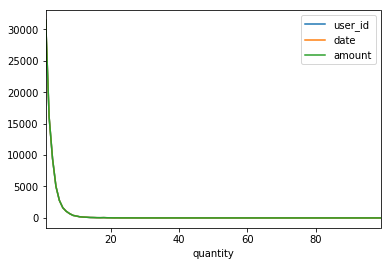

In [7]:
data.groupby('quantity').count().plot()

In [8]:
bins=[0,10,20,30,40,50,100]
cut_data=pd.cut(data['quantity'],bins)
cut_data

0        (0, 10]
1        (0, 10]
2        (0, 10]
3        (0, 10]
4        (0, 10]
5        (0, 10]
6        (0, 10]
7        (0, 10]
8        (0, 10]
9        (0, 10]
10       (0, 10]
11       (0, 10]
12       (0, 10]
13       (0, 10]
14       (0, 10]
15       (0, 10]
16       (0, 10]
17       (0, 10]
18       (0, 10]
19       (0, 10]
20       (0, 10]
21       (0, 10]
22       (0, 10]
23       (0, 10]
24       (0, 10]
25       (0, 10]
26       (0, 10]
27       (0, 10]
28       (0, 10]
29       (0, 10]
          ...   
69628    (0, 10]
69629    (0, 10]
69630    (0, 10]
69631    (0, 10]
69632    (0, 10]
69633    (0, 10]
69634    (0, 10]
69635    (0, 10]
69636    (0, 10]
69637    (0, 10]
69638    (0, 10]
69639    (0, 10]
69640    (0, 10]
69641    (0, 10]
69642    (0, 10]
69643    (0, 10]
69644    (0, 10]
69645    (0, 10]
69646    (0, 10]
69647    (0, 10]
69648    (0, 10]
69649    (0, 10]
69650    (0, 10]
69651    (0, 10]
69652    (0, 10]
69653    (0, 10]
69654    (0, 10]
69655    (0, 1

In [9]:
quality_cut=pd.value_counts(cut_data)
quality_cut

(0, 10]      68838
(10, 20]       722
(20, 30]        73
(30, 40]        16
(50, 100]        5
(40, 50]         4
Name: quantity, dtype: int64

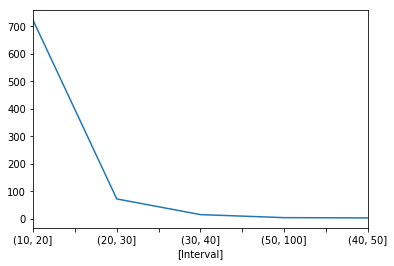

In [28]:
quality_cut[1:].plot()

In [29]:
quality_cut=pd.DataFrame({'count':quality_cut,'rate':0})

In [31]:
quality_cut['rate']=quality_cut['count'].map(lambda x:x/data['user_id'].count())

In [37]:
quality_cut

,count,rate
[Interval],,
"(0, 10]",68838,0.988228
"(10, 20]",722,0.010365
"(20, 30]",73,0.001048
"(30, 40]",16,0.000230
"(50, 100]",5,0.000072
"(40, 50]",4,0.000057
